<a href="https://colab.research.google.com/github/wksmirnowa/machinelearning_homeworks/blob/master/HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем и разархивируем данные


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tarfile
data = tarfile.open('/content/drive/My Drive/aclImdb_v1.tar', 'r')
data.extractall()

Импортируем все необходимое сразу

In [0]:
import numpy as np
import os
import csv
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


Запишем тренировочные и тестовые данные в отдельные файлы

In [0]:
os.chdir('/content/drive/My Drive')

In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Так как колаб перестает работать, если дать ему все данные, сократим их размер.

In [0]:
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)
train_data_short = train_data.sample(10000)
test_data_short = train_data.sample(10000)

In [0]:
train_data_short.shape

(10000, 3)

In [0]:
test_data_short.shape

(10000, 3)

Переименуем сразу метки pos в 1, а neg в 0, чтобы потом было проще считать ROC кривую.

In [0]:
test_data_short['Polarity'] = test_data_short['Polarity'].map({'pos': 1, 'neg': 0}) 
train_data_short['Polarity'] = train_data_short['Polarity'].map({'pos': 1, 'neg': 0}) 

In [0]:
test_data_short.head(5)

In [0]:
train_data_short.head(5)

In [0]:
test_data_short.drop(['Unnamed: 0'], axis=1, inplace=True)

In [0]:
train_data_short.drop(['Unnamed: 0'], axis=1, inplace=True)

In [0]:
count_vect = CountVectorizer()

In [20]:
X_train_counts = count_vect.fit_transform(train_data_short.Text)
X_train_counts.shape

(10000, 51584)

In [0]:
X_test = count_vect.transform(test_data_short.Text)

Сначала я попробовала метод наивного Байеса и линейную регрессию, с нашими данными они сработали в принципе хорошо. Потом я решила попробовать метод ближайшего соседа, метод опорных векторов и деревья решения, но, к сожалению, ни один из этих методов не дал хороших результатов. Я решила оставить в данной тетрадке все опробованные мной методы, чтобы показать, какие результаты я получила.

Негативные и позитивные отзывы я выводила только для моделей, сработавших хорошо.

## Метод ближайшего соседа  [Nearest neighbor classifier]



In [0]:
clf_KN = KNeighborsClassifier().fit(X_train_counts, test_data_short.Polarity)

In [0]:
predicted_KN = clf_KN.predict(X_test)
# predicted_proba_KN = clf_KN.predict_proba(X_test)

In [117]:
acc = accuracy_score(predicted_KN, test_data_short.Polarity)
micro_f1 = f1_score(predicted_KN, test_data_short.Polarity, average = 'micro')
micro_p = precision_score(predicted_KN, test_data_short.Polarity, average = 'micro')
micro_r = recall_score(predicted_KN, test_data_short.Polarity, average = 'micro')
macro_f1 = f1_score(predicted_KN, test_data_short.Polarity, average = 'macro')
macro_p = precision_score(predicted_KN, test_data_short.Polarity, average = 'macro')
macro_r = recall_score(predicted_KN, test_data_short.Polarity, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.4926
micro F1=0.4926, micro P=0.4926, micro R=0.4926
macro F1=0.4924, macro P=0.4926, macro R=0.4926



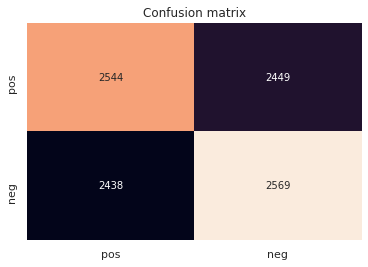

In [0]:
sns.heatmap(data=confusion_matrix(test_data_short.Polarity, predicted_KN), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

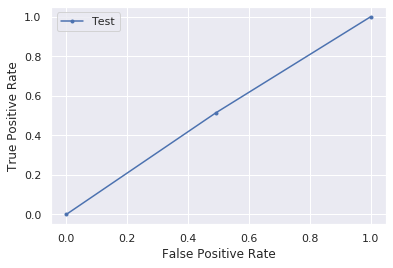

0.5112975021431042


In [0]:
y_true = test_data_short.Polarity #как было в корпусе
y_predicted = predicted_KN #как сработал алгоритм
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(roc_auc_score(y_true, y_predicted))

In [0]:
test_data_short.insert(loc=6, column='prediction_KN', value=predicted_KN)

In [0]:
tp = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_KN'] == 1)])
fp = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_KN'] == 1)])
tn = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_KN'] == 0)])
fn = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_KN'] == 0)])

In [120]:
precision = tp / (tp + fp)
precision

0.4918032786885246

In [121]:
recall = tp / (tp + fn)
recall

0.4744744744744745

In [122]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.48298349296922766

## Метод наивного Байеса  [Multinomial naive Bayes classifier]
	
	




### Мультиномиальный наивный Байсовский классификатор 

In [0]:
X_test = count_vect.transform(test_data_short.Text)
clf_NB = MultinomialNB().fit(X_train_counts, train_data_short.Polarity)
predicted_NB = clf_NB.predict(X_test)
predicted_proba_NB = clf_NB.predict_proba(X_test)

In [71]:
acc = accuracy_score(predicted_NB, test_data_short.Polarity)
micro_f1 = f1_score(predicted_NB, test_data_short.Polarity, average = 'micro')
micro_p = precision_score(predicted_NB, test_data_short.Polarity, average = 'micro')
micro_r = recall_score(predicted_NB, test_data_short.Polarity, average = 'micro')
macro_f1 = f1_score(predicted_NB, test_data_short.Polarity, average = 'macro')
macro_p = precision_score(predicted_NB, test_data_short.Polarity, average = 'macro')
macro_r = recall_score(predicted_NB, test_data_short.Polarity, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8790
micro F1=0.8790, micro P=0.8790, micro R=0.8790
macro F1=0.8789, macro P=0.8790, macro R=0.8803



In [0]:
categories = ['pos', 'neg']

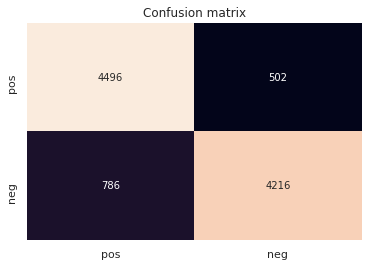

In [0]:
sns.heatmap(data=confusion_matrix(test_data_short.Polarity, predicted_NB), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

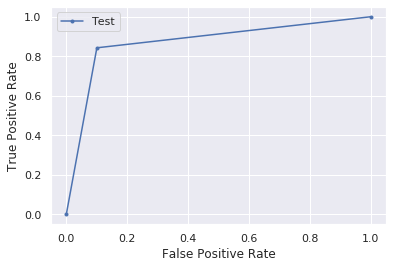

0.8712113393938143


In [0]:
y_true = test_data_short.Polarity #как было в корпусе
y_predicted = predicted_NB #как сработал алгоритм
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(roc_auc_score(y_true, y_predicted))

In [0]:
#негативные отзывы
probabilities_NB = clf_NB.predict_proba(X_test)[:,1]
most_neg = probabilities_NB.argsort()[:15]
neg_reviews = []
for rev in most_neg:
  is_not_repeat = True
  for neg in neg_reviews:
    if (neg-rev).any():
      is_not_repeat = False
      break
  if is_not_repeat:
    neg_reviews.append(rev)
def find_text(index: int):
  for i, text in enumerate(test_data_short.Text):
    if i == index:
      return text
  return None

In [0]:
#позитивные отзывы
probabilities_NB = clf_NB.predict_proba(X_test)[:, 1]
most_pos = probabilities_NB.argsort()[-15:]
pos_reviews = []
for rev in most_pos:
  is_not_repeat = True
  for pos in pos_reviews:
    if (pos-rev).any():
      is_not_repeat = False
      break
  if is_not_repeat:
    pos_reviews.append(rev)

In [50]:
for rev in most_neg: #негативные отзывы
  print(find_text(rev))

Waitress: Honey, here's them eggs you ordered. Honey, like bee, get it? That's called pointless foreshadowing.<br /><br />Edward Basket: Huh? (On the road) Basket: Here's your doll back, little girl. You really shouldn't be so careless with your belongings.<br /><br />Little girl: Yeah, whatever.<br /><br />Crash! Boom! Whoosh! Crackle Basket: I think that something bad is about to happen.<br /><br />(Later) Basket: Mmmm. Vicodin! What the ? (Tears open letter.) Wow! My ex-girl's handwriting has really improved. And look, her missing daughter looks kinda like the girl with the doll I accidentally was sort of responsible for getting killed, in a way. And she kind of has my hairline. I wonder, should I torture myself and go find her? Let's see what my friends at the precinct think.<br /><br />Basket's fellow male cop: HAHAHA. Willow's a funny name.<br /><br />Basket: I think that something bad is about to happen.<br /><br />(On the island) Basket: What's in the sack? AHHH.<br /><br />T

In [51]:
for rev in most_pos: #позитивные отзывы
  print(find_text(rev))

The bittersweet twist to this movie contains a wonderful element of romanticism that evokes an impetuous passion! These characteristics of idealistic imagery which "Moonstruck" possesses, spur on an end result of a resounding thumbs up verdict by virtually every prominent critic in Hollywood. Let me describe the circumstances to this film, simply put, they are "yesteryear". "Moonstruck" is a cohesive film which sparks the naivety of an old Italian neighborhood in New York City. New York City has always been one big melting pot that is galvanized by many bicker-some mannerisms which are indicative of typical New Yorkers, this includes a lot of Italian Americans living in New York as well! The mid and late eighties brought on an abrupt conclusion to many strong associations with various cultural stereotypes. Ethnicity polarization was a firmly embedded scourge in American history that was far more prevalent several generations before this movie was made. These generalizing proclivities s

In [0]:
test_data_short.insert(loc=2, column='prediction_NB', value=predicted_NB)

In [0]:
test_data_short.head(5)

Когда я попробовала посчитать здесь метрики, я увидела, что мои метрики слегка отличаются от метрик, сделанных автоматически

In [0]:
tp = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_NB'] == 1)])
fp = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_NB'] == 1)])
tn = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_NB'] == 0)])
fn = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_NB'] == 0)])

In [88]:
precision = tp / (tp + fp)
precision

0.9018899978764069

In [89]:
recall = tp / (tp + fn)
recall

0.8502502502502503

In [90]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.8753091508656223

## Логистическая регрессия (метод максимальной энтропии [MaxEnt])

Эта модель сработала лучше всех остальных по качеству, считаю, что это лучший классификатор.

In [0]:
clf_LR = LogisticRegression(max_iter=10000).fit(X_train_counts, train_data_short.Polarity)
predicted_LR = clf_LR.predict(X_test)

In [0]:
acc = accuracy_score(predicted_LR, test_data_short.Polarity)
micro_f1 = f1_score(predicted_LR, test_data_short.Polarity, average = 'micro')
micro_p = precision_score(predicted_LR, test_data_short.Polarity, average = 'micro')
micro_r = recall_score(predicted_LR, test_data_short.Polarity, average = 'micro')
macro_f1 = f1_score(predicted_LR, test_data_short.Polarity, average = 'macro')
macro_p = precision_score(predicted_LR, test_data_short.Polarity, average = 'macro')
macro_r = recall_score(predicted_LR, test_data_short.Polarity, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.9181
micro F1=0.9181, micro P=0.9181, micro R=0.9181
macro F1=0.9181, macro P=0.9181, macro R=0.9183



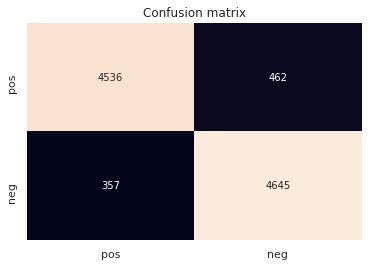

In [0]:
sns.heatmap(data=confusion_matrix(test_data_short.Polarity, predicted_LR), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

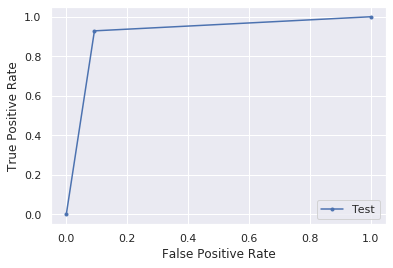

0.918095786895326


In [0]:
y_true = test_data_short.Polarity #как было в корпусе
y_predicted = predicted_LR #как сработал алгоритм
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(roc_auc_score(y_true, y_predicted))

In [0]:
probabilities_LR = clf_LR.predict_proba(X_test)[:,1]
most_neg = probabilities_LR.argsort()[:15]
neg_reviews = []
for rev in most_neg:
  is_not_repeat = True
  for neg in neg_reviews:
    if (neg-rev).any():
      is_not_repeat = False
      break
  if is_not_repeat:
    neg_reviews.append(rev)
def find_text(index: int):
  for i, text in enumerate(test_data_short.Text):
    if i == index:
      return text
  return None

In [41]:
for rev in most_neg: #негативные
  print(find_text(rev))

I have never seen any of Spike Lee's prior films, as their trailers never caught my interest. I have seen, and admire Denzel Washington, and Jodie Foster's work, and have several of their DVDs. I was, however, entirely disappointed with this movie. If this film is any indication of Spike Lee's ability as a director, my advice would be to "get a job", and stop wasting the time and talent of others. <br /><br />I wonder if some of the other IMDb commentators watched the same movie that I'd seen. I can only assume, from their sappy lovelorn reviews, that their adoration of Spike Lee has blinded them to the banality of this piece of work. I only paid $2.50, in a "Second Run" theater, and still felt I'd wasted my money.<br /><br />The IMDb "Trivia" page says it all.......<br /><br />* "Shot in 39 days" -- How can you expect to shoot a big budget "Blockbuster", (as the media hype promised), in such a short time? No wonder there was such a weak performance by all.<br /><br />* "Ron Howard was

In [0]:
probabilities_LR = clf_LR.predict_proba(X_test)[:,1]
most_pos = probabilities_LR.argsort()[-15:]
pos_reviews = []
for rev in most_pos:
  is_not_repeat = True
  for pos in pos_reviews:
    if (pos-rev).any():
      is_not_repeat = False
      break
  if is_not_repeat:
    pos_reviews.append(rev)
def find_text(index: int):
  for i, text in enumerate(test_data_short.Text):
    if i == index:
      return text
  return None

In [47]:
for rev in most_pos: #позитивные
  print(find_text(rev))

{Possible spoilers coming up... you've been forewarned.}<br /><br />This is absolutely one of my all time favorite musicals and movie musicals! (The other is Damn Yankees with Gwen Verdon, Tab Hunter and Ray Walston) As we all know, sometimes the luster (not to mention the songs) of a show are lost in its transition from stage to screen. This is, for the most part, DEFINITELY not the case here.<br /><br />The sets are divine, bright and colorful, the characters are bigger than life and you can't help but love them, and Michael Kidd's choreography is absolutely stunning. (So glad to know they used the original Broadway choreographer)<br /><br />All of the actors "bounce the ball" (that is, have unbeatable chemistry) to perfection in this film. Frank and Marlon are absolutely believable as the proprietor of the oldest established permanent floating crap game in New York, and the most notorious gambler who bets on even the most minute things-- such as his fever going up to 104 if he doesn

In [0]:
test_data_short.insert(loc=3, column='prediction_LR', value=predicted_LR)

In [77]:
test_data_short.head(5)

,Text,Polarity,prediction_NB,prediction_LR
23004,"Well, I hate hollywood, but love cinema so i h...",0,0,0
3543,"***1/2 Scarlett Johansson, Woody Allen, Hugh J...",1,1,1
3135,Pretty good film from Preminger; labyrinthine ...,1,1,1
3835,I actually like Asylum movies. I've made it a ...,0,0,0
18045,"While watching this movie, I came up with a sc...",0,0,0


Когда я попробовала посчитать метрики, то увидела, что посчитанные мною метрики немного меньше посчитанных автоматически, но разница здесь не сильно большая.

In [0]:
tp = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_LR'] == 1)])
fp = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_LR'] == 1)])
tn = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_LR'] == 0)])
fn = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_LR'] == 0)])

In [92]:
precision = tp / (tp + fp)
precision

0.912007874015748

In [93]:
recall = tp / (tp + fn)
recall

0.9275275275275275

In [94]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.9197022332506203

## Метод опорных векторов [Support vector machine, SVM]

In [109]:
clf_SVM = LinearSVC(max_iter=10000).fit(X_train_counts, test_data_short.Polarity)
predicted_SVM = clf_SVM.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
acc = accuracy_score(predicted_SVM, test_data_short.Polarity)
micro_f1 = f1_score(predicted_SVM, test_data_short.Polarity, average = 'micro')
micro_p = precision_score(predicted_SVM, test_data_short.Polarity, average = 'micro')
micro_r = recall_score(predicted_SVM, test_data_short.Polarity, average = 'micro')
macro_f1 = f1_score(predicted_SVM, test_data_short.Polarity, average = 'macro')
macro_p = precision_score(predicted_SVM, test_data_short.Polarity, average = 'macro')
macro_r = recall_score(predicted_SVM, test_data_short.Polarity, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.4972
micro F1=0.4972, micro P=0.4972, micro R=0.4972
macro F1=0.4972, macro P=0.4972, macro R=0.4972



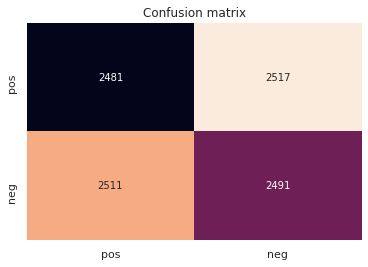

In [0]:
sns.heatmap(data=confusion_matrix(test_data_short.Polarity, predicted_SVM), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

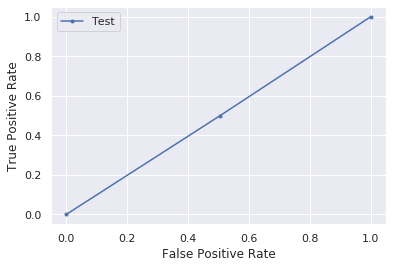

0.49719967955194877


In [0]:
y_true = test_data_short.Polarity #как было в корпусе
y_predicted = predicted_SVM #как сработал алгоритм
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

print(roc_auc_score(y_true, y_predicted))

In [0]:
test_data_short.insert(loc=5, column='prediction_SVM', value=predicted_SVM)

In [0]:
tp = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_SVM'] == 1)])
fp = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_SVM'] == 1)])
tn = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_SVM'] == 0)])
fn = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_SVM'] == 0)])

In [112]:
precision = tp / (tp + fp)
precision

0.4991873222267371

In [113]:
recall = tp / (tp + fn)
recall

0.4918918918918919

In [114]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.49551275587375215

## Деревья решений 

Уже по метрикам становится понятно, что продолжать работать дальше с этим методом бессмысленно.

In [0]:
clf_T = DecisionTreeClassifier().fit(X_train_counts, test_data_short.Polarity)
predicted_T = clf_T.predict(X_test)

In [96]:
acc = accuracy_score(predicted_T, test_data_short.Polarity)
micro_f1 = f1_score(predicted_T, test_data_short.Polarity, average = 'micro')
micro_p = precision_score(predicted_T, test_data_short.Polarity, average = 'micro')
micro_r = recall_score(predicted_T, test_data_short.Polarity, average = 'micro')
macro_f1 = f1_score(predicted_T, test_data_short.Polarity, average = 'macro')
macro_p = precision_score(predicted_T, test_data_short.Polarity, average = 'macro')
macro_r = recall_score(predicted_T, test_data_short.Polarity, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.4908
micro F1=0.4908, micro P=0.4908, micro R=0.4908
macro F1=0.4908, macro P=0.4908, macro R=0.4908



In [0]:
# test_data_short.drop('prediction_T', axis=1, inplace=True)

In [0]:
test_data_short.insert(loc=4, column='prediction_T', value=predicted_T)

In [0]:
tp = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_T'] == 1)])
fp = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_T'] == 1)])
tn = len(test_data_short.loc[(test_data_short.Polarity == 0) & (test_data_short['prediction_T'] == 0)])
fn = len(test_data_short.loc[(test_data_short.Polarity == 1) & (test_data_short['prediction_T'] == 0)])

In [105]:
precision = tp / (tp + fp)
precision

0.4902786129484867

In [106]:
recall = tp / (tp + fn)
recall

0.4896896896896897

In [107]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.4899839743589744